In [1]:
import h5py
import numpy
import os
import scipy.io

In [2]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from matplotlib import colormaps as cm

In [3]:
from utils.path import RAW_UT
from utils import file

In [4]:
rawX = scipy.io.loadmat(os.path.join(RAW_UT, 'trento_data.mat'))['HSI_data']
rawX = numpy.transpose(rawX, (2, 0, 1))
rawY = scipy.io.loadmat(os.path.join(RAW_UT, 'trento_data.mat'))['ground']

## Spatially disjoint train/test split

The training mask is specified here as `trMask`, followed by its visualization. We try to keep the number of training samples for each class similar. Correspoinding `vaMask` is also provided.

In [5]:
trMask = numpy.zeros_like(rawY)

# 1 - apple
trMask[90:98, 202:211] = 1
trMask[120:128, 207:216] = 1
trMask[100:108, 275:284] = 1
trMask[120:128, 280:289] = 1
trMask[140:148, 285:294] = 1

# 2 - Buildings
trMask[67:72, 96:102] = 1
trMask[91:97, 113:119] = 1
trMask[48:53, 150:156] = 1
trMask[12:17, 139:145] = 1
trMask[22:27, 108:114] = 1
trMask[3:8, 91:97] = 1
trMask[7:12, 69:75] = 1
trMask[31:36, 83:89] = 1
trMask[127:131, 240:244] = 1
trMask[111:115, 244:248] = 1
trMask[59:63, 251:255] = 1
trMask[5:11, 400:406] = 1
trMask[145:153, 523:531] = 1

# 3 - Ground
tmp = rawY == 3
tmp[71:, :] = False
tmp[:, 400:] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:140, :] = False
tmp[:, 212:] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:110, :] = False
tmp[140:, :] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[140:, :] = False
tmp[:, 300:] = False
tmp[:, :250] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:, :310] = False
tmp[:, 325:] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:100, :] = False
tmp[105:, :] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:, :333] = False
tmp[:, 340:] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[:160, :] = False
trMask[tmp] = 1

tmp = rawY == 3
tmp[19:, :] = False
trMask[tmp] = 1

# 4 - Woods
trMask[40:51, 30:41] = 1
trMask[70:81, 40:51] = 1
trMask[100:111, 50:61] = 1

# 5 - Vineyard
trMask[115:127, 370:381] = 1
trMask[80:92, 470:481] = 1
trMask[80:92, 545:556] = 1

# 6 - Roads
trMask[80:85, 100] = 1
trMask[80:85, 101:105] = 1
trMask[79:84, 105:108] = 1
trMask[77:82, 108:110] = 1
trMask[43:48, 85:91] = 1
trMask[50:55, 97:101] = 1
trMask[35:40, 128:134] = 1
trMask[25:30, 119:121] = 1
trMask[69:73, 128:130] = 1
trMask[68:72, 130:132] = 1
trMask[56:61, 160:162] = 1
trMask[56:60, 162:164] = 1
trMask[17:21, 165:168] = 1
trMask[62:70, 186:188] = 1
tmp = rawY == 6
tmp[:102, :] = False
tmp[120:, :] = False
tmp[:, 270:] = False
trMask[tmp] = 1
tmp = rawY == 6
tmp[:, :200] = False
tmp[:, 300:] = False
tmp[:42, :] = False
tmp[48:, :] = False
trMask[tmp] = 1
tmp = rawY == 6
tmp[:, :300] = False
tmp[:, 400:] = False
tmp[:40, :] = False
tmp[60:, :] = False
trMask[tmp] = 1
tmp = rawY == 6
tmp[:, :450] = False
tmp[:110, :] = False
tmp[120:, :] = False
trMask[tmp] = 1

In [6]:
vaMask = (rawY != 0).astype(int) - trMask

In [7]:
name2Idx = {
    "Background": 0,
    "Apple": 1,
    "Building": 2,
    "Ground": 3,
    "Woods": 4,
    "Vineyard": 5,
    "Roads": 6
}

(-0.5, 599.5, 165.5, -0.5)

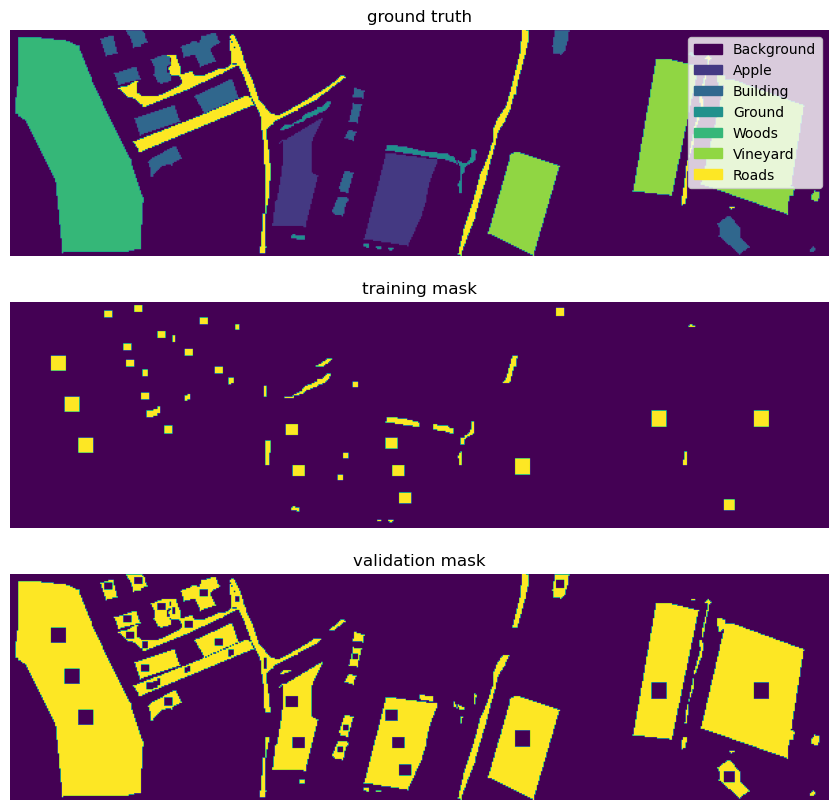

In [8]:
plt.figure(figsize=(18, 10))
plt.subplot(311)
plt.imshow(rawY, cmap='viridis')
cmap = cm['viridis'].resampled(len(name2Idx))
patches =[mpatches.Patch(color=cmap(name2Idx[land]), label=land) for land in name2Idx.keys()]
plt.legend(handles=patches)
plt.title('ground truth')
plt.axis('off')
plt.subplot(312)
plt.imshow(trMask)
plt.title('training mask')
plt.axis('off')
plt.subplot(313)
plt.imshow(vaMask)
plt.title('validation mask')
plt.axis('off')

In [9]:
trMask = trMask.astype(bool)
vaMask = vaMask.astype(bool)

In [10]:
print('Basic statistics for University of Trento:\n')
print("#all\t#train\t#test".rjust(33))
totalAll, totalTra, totalVal = 0, 0, 0
for land in name2Idx.keys():
    thisAll = numpy.sum(rawY==name2Idx[land])
    thisTra = numpy.sum(rawY[trMask]==name2Idx[land])
    thisVal = numpy.sum(rawY[vaMask]==name2Idx[land])
    totalAll += thisAll
    totalTra += thisTra
    totalVal += thisVal
    print(f"{land:>12}:\t{thisAll}\t{thisTra}\t{thisVal}")
print(f"{'':<7}Total:\t{totalAll}\t{totalTra}\t{totalVal}")

Basic statistics for University of Trento:

                #all	#train	#test
  Background:	69386	0	0
       Apple:	4034	360	3674
    Building:	2903	394	2509
      Ground:	479	365	114
       Woods:	9123	363	8760
    Vineyard:	10501	396	10105
       Roads:	3174	398	2776
       Total:	99600	2276	27938


Now we can save the dataset.

In [11]:
print(rawX.shape, rawY.shape, trMask.shape, vaMask.shape)
with h5py.File('../UniTrento.h5', 'w') as h5w:
    h5w.create_dataset('HSI', data=rawX)
    h5w.create_dataset('gt', data=rawY)
    h5w.create_dataset('trMask', data=trMask)
    h5w.create_dataset('vaMask', data=vaMask)

(63, 166, 600) (166, 600) (166, 600) (166, 600)
